# ML

## 평가지표

## 분류모델

### 로지스틱 회귀
- 회귀 모델이지만, 이진분류

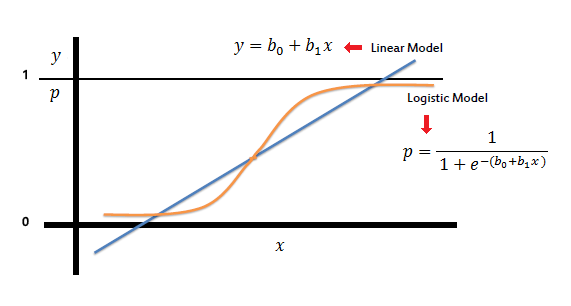

- train_test_split(stratify=cancer.target) : 이진분류에서 test 데이터 분리할 때, 타겟이 적절한 비율로 나뉘도록 설정, 분류모델일때 넣어야한다

In [7]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

from sklearn.model_selection import train_test_split

X_tr, X_te, y_tr, y_te = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42
)

In [8]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression().fit(X_tr, y_tr)
print(f'훈련용 평가지표: {logreg.score(X_tr, y_tr)} / 테스트용 평가지표: {logreg.score(X_te, y_te)}')

훈련용 평가지표: 0.9553990610328639 / 테스트용 평가지표: 0.9440559440559441


c:\Users\Playdata\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


훈련용 평가지표와 테스트용 평가지표가 비슷하게 나왔다. 이는 과소적합. 즉, 훈련이 덜되었다고 해석할 수 있다.    
  
하이퍼파리미터 C는 정규화(L2 규제)를 조절하는 값이다. 해당 값은 꼭 양의 실수값이어야 한다.   
하이퍼파리미터 C이 낮을 수록 계수를 0으로 근사하므로 정규화가 강화된다고 해석할 수 있습니다.

In [9]:
logreg100 = LogisticRegression(C=100).fit(X_tr, y_tr)
print(f'훈련용 평가지표: {logreg100.score(X_tr, y_tr)} / 테스트용 평가지표: {logreg100.score(X_te, y_te)}')

훈련용 평가지표: 0.9577464788732394 / 테스트용 평가지표: 0.958041958041958


c:\Users\Playdata\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
logreg001 = LogisticRegression(C=0.01).fit(X_tr, y_tr)
print(f'훈련용 평가지표: {logreg001.score(X_tr, y_tr)} / 테스트용 평가지표: {logreg001.score(X_te, y_te)}')

훈련용 평가지표: 0.9342723004694836 / 테스트용 평가지표: 0.9300699300699301


c:\Users\Playdata\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


- 0에 가까울수록 도움이 안되는 feature

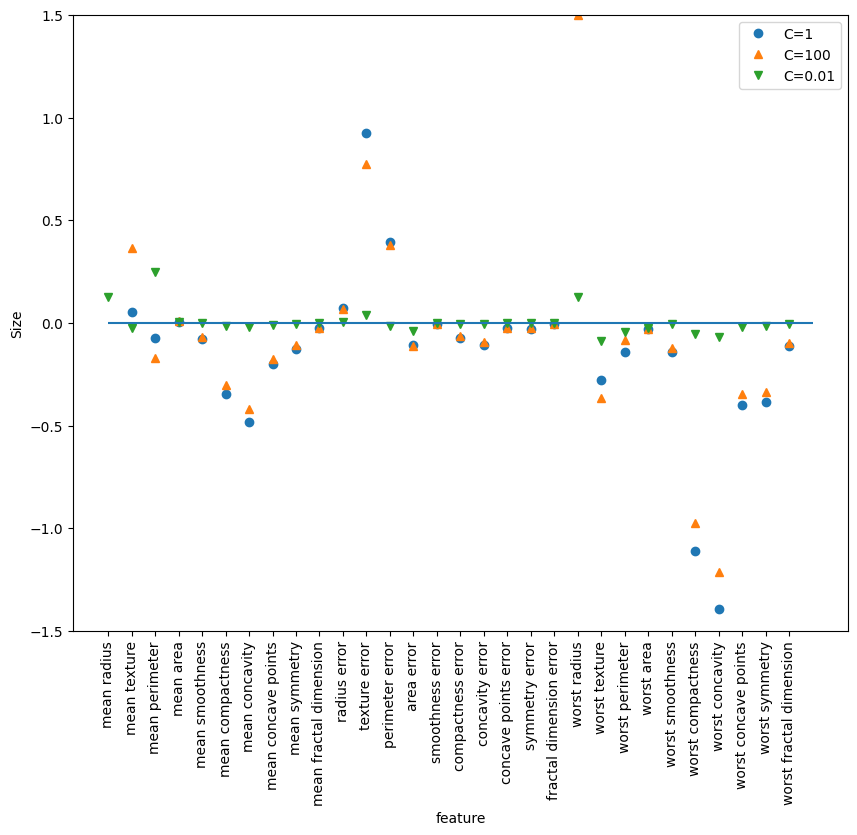

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))

plt.plot(logreg.coef_.T, 'o', label='C=1')
plt.plot(logreg100.coef_.T, '^', label='C=100')
plt.plot(logreg001.coef_.T, 'v', label='C=0.01')

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0,0, cancer.data.shape[1])
plt.ylim(-1.5,1.5)
plt.xlabel("feature")
plt.ylabel("Size") # 계수 크기
plt.legend()

## 의사결정나무(Decision Tree)

- 회귀,분류 둘다 사용 가능한 알고리즘
- 여러가지 규칙을 순차적으로 적용하면서 트리기반의 규칙을 만들어 예측하는 알고리즘
- 데이터를 분할 하는데 순수도가 높은 방향으로 규칙을 정한다.
- 순수도
    - 각 노드의 규칙에 의해 동일한 클래스가 포함되는 정도를 의미
    - 부모노드의 순수도에 비해 자식노드들에 순수도가 증가하도록 트리를 형성
- 순수도 척도
    - entropy: 엔트로피는 데이터의 혼자도를 의미한다. 엔트로피값이 0이 될때까지 계층이 만들어진다.
    - gini: gini(불평등지수) 값이 0이면 평등하다는 것을(분류가 잘됐다). 뜻한다. 이 값 역시 0이 될때까지 계층이 만들어진다.
    - gini, entropy값이 0에 가까울 수록 순수도가 높다는 뜻이다.

- root node: 최상단에 위치한 노드(시작점)
- leaf node: 더 이상의 규칙을 정할 수 없는 노드(결정된 클래스 값)
- max nodes: gini/entropy값이 0이 되지 않더라도, max nodes 값 이상으로 노드를 만들지 않음
- min samples split: 해당 노드가 가지고 있는 최소한의 샘플의 개수를 나타낸다.
- min sample leaf: 또 다른 노드를 만들 수 있는 최소한의 샘플 수 조건을 뜻한다.

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
cancer = load_breast_cancer()
X_tr, X_te, y_tr, y_te = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42
)

In [14]:
hp = {
    "random_state":42,
    "max_depth":4 ,# 최대 깊이
    "min_samples_split":2, # 노드를 분할하는데 필요한 최소한의 샘플수
    "criterion" : "entropy", # 순수도 척도
    "max_leaf_nodes" : 10, # 최대리프노드수, 과적합 방지
    "min_samples_leaf" : 20, # 리프노드에 있어야할 최소 샘플수
}

tree = DecisionTreeClassifier(**hp).fit(X_tr, y_tr)
print(f'훈련용 평가지표: {tree.score(X_tr, y_tr)} / 테스트용 평가지표: {tree.score(X_te, y_te)}')

훈련용 평가지표: 0.9460093896713615 / 테스트용 평가지표: 0.916083916083916


In [15]:
plt.figure(figsize=(10,8))

sns.barplot(x=tree.feature_importances_,y=cancer.feature_names)
plt.show()

NameError: name 'sns' is not defined

<Figure size 1000x800 with 0 Axes>

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree, out_file="tree.dot", class_names=["악성", "양성"],
    feature_names=cancer.feature_names, impurity=False, filled=True)

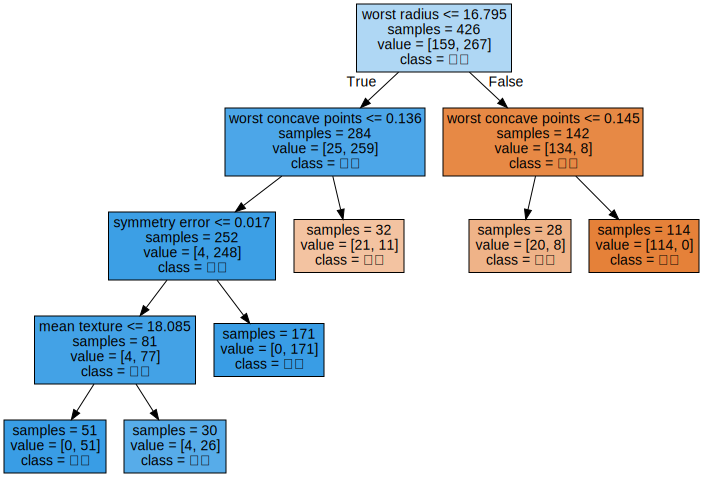

In [ ]:
import graphviz

with open("tree.dot") as f:
  dot_graph = f.read()

display(graphviz.Source(dot_graph))